In [1]:
import warnings
import pandas as pd
import numpy as np
import astropy.units as u
from matplotlib import pyplot, colors
from astropy.coordinates import SkyCoord
from gammapy.stats import WStatCountsStatistic
from utils import merge_hdf_files, calc_angular_separation

In [2]:
pyplot.rcParams['figure.figsize'] = (12, 9)
pyplot.rcParams['font.size'] = 15
pyplot.rcParams['grid.linestyle'] = ':'

color_cycle = pyplot.rcParams['axes.prop_cycle'].by_key()['color']
warnings.simplefilter('ignore')

# Load DL2 data

In [3]:
# === setting ===
data_mask = '../2020_*/4.dl1_to_dl2/data/dl2/merged/*.h5'

# === main ===
data_stereo = merge_hdf_files(data_mask, n_files=5)
data_stereo.sort_index(inplace=True)

n_events_total = len(data_stereo.groupby(['obs_id', 'event_id']).size()) 
print(f'\nIn total {n_events_total} stereo events are found.') 

print('\nEvents with 2 tels info:')

tel_ids_dict = {
    'LST-1 + MAGIC-I': [1, 2],
    'LST-1 + MAGIC-II': [1, 3],
    'MAGIC-I + MAGIC-II': [2, 3]
}

for tel_name, tel_ids, in zip(tel_ids_dict.keys(), tel_ids_dict.values()):
    
    df = data_stereo.query(f'(tel_id == {list(tel_ids)}) & (multiplicity == 2)')
    n_events = np.sum(df.groupby(['obs_id', 'event_id']).size().values == 2)
    print(f'{tel_name}: {n_events} events ({n_events/n_events_total*100:.1f}%)')
    
print('\nEvents with 3 tels info:')

n_events = len(data_stereo.query(f'multiplicity == 3').groupby(['obs_id', 'event_id']).size())
print(f'LST-1 + MAGIC-I + MAGIC-II: {n_events:.0f} events ({n_events/n_events_total*100:.1f}%)')


Merging the input data to subsets...
../2020_11_18/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run02923.h5
../2020_11_18/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run02924.h5
../2020_12_13/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run03234.h5
../2020_12_13/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run03235.h5
../2020_12_15/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run03265.h5
--> ../2020_11_18/4.dl1_to_dl2/data/dl2/merged/subset_dl2_lst1_magic_Run02923_to_dl2_lst1_magic_Run03265.h5

../2020_12_15/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run03266.h5
../2020_12_15/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run03267.h5
../2020_12_15/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run03268.h5
../2020_12_22/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run03382.h5
../2020_12_22/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run03383.h5
--> ../2020_11_18/4.dl1_to_dl2/data/dl2/merged/subset_dl2_lst1_magic_Run03266_to_dl2_lst1_magic_Run03383.h5

Merging the subset data:
../2020_11_18/4.dl1

In [4]:
data_stereo.head()

obs_id_lst  event_id_lst   intensity         x  \
obs_id  event_id tel_id                                                   
5093174 2122     1           2923.0     2054288.0  307.962953 -0.315250   
                 2           2923.0     2054288.0  108.671875  0.027797   
        2126     1           2923.0     2054414.0  174.241061  0.010928   
                 2           2923.0     2054414.0  176.444987  0.319373   
        2130     1           2923.0     2054693.0  646.928410 -0.682803   

                                y         r         phi    length     width  \
obs_id  event_id tel_id                                                       
5093174 2122     1       0.533384  0.619582  120.584658  0.153488  0.051308   
                 2       0.335385  0.336535   85.262067  0.085343  0.017875   
        2126     1      -0.131373  0.131827  -85.244971  0.101673  0.049368   
                 2       0.086378  0.330847   15.134165  0.092057  0.019301   
        2130     1       0.063893  0.685786  174.654160  0.138337  0.056016   

                               psi  ...     ra_tel    dec_tel    ra_reco  \
obs_id  event_id tel_id             ...                                    
5093174 2122     1      -31.610509  ...  83.963124  22.247049  83.346973   
                 2      -25.261473  ...  83.967988  22.245614  82.422005   
        2126     1       10.226202  ...  83.963123  22.247052  82.932625   
                 2       53.087812  ...  83.967990  22.245614  82.050592   
        2130     1       39.110881  ...  83.963122  22.247059  84.332838   

                          dec_reco  ra_reco_mean  dec_reco_mean  \
obs_id  event_id tel_id                                           
5093174 2122     1       22.009114     84.866105      20.106463   
                 2       22.145910     84.866105      20.106463   
        2126     1       22.660566     83.160144      22.706243   
                 2       21.856361     83.160144      22.706243   
        2130     1       21.326110     84.446739      21.245125   

                         event_class_0  event_class_1  event_class_0_mean  \
obs_id  event_id tel_id                                                     
5093174 2122     1            0.135700       0.864300            0.131926   
                 2            0.128152       0.871848            0.131926   
        2126     1            0.012250       0.987750            0.013304   
                 2            0.014359       0.985641            0.013304   
        2130     1            0.395065       0.604935            0.672623   

                         event_class_1_mean  
obs_id  event_id tel_id                      
5093174 2122     1                 0.868074  
                 2                 0.868074  
        2126     1                 0.986696  
                 2                 0.986696  
        2130     1                 0.327377  

[5 rows x 53 columns]

# Arrange the data frame

In [5]:
params = ['ra_tel', 'dec_tel', 'ra_reco_mean', 'dec_reco_mean', 
          'energy_reco_mean', 'event_class_0_mean', 'multiplicity', 'timestamp']

df_dl2 = data_stereo.groupby(['obs_id', 'event_id']).mean()[params]
df_dl2.query('multiplicity == 3', inplace=True)

print(f'DL2 data frame: {len(df_dl2)} events')

DL2 data frame: 813157 events


In [6]:
df_dl2.head()

ra_tel    dec_tel  ra_reco_mean  dec_reco_mean  \
obs_id  event_id                                                      
5093174 2130      83.966938  22.246320     84.446739      21.245125   
        2132      83.966939  22.246320     82.936126      22.439017   
        2134      83.966939  22.246321     84.532000      22.225370   
        2136      83.966939  22.246322     85.523416      22.437677   
        2140      83.966940  22.246323     83.865117      20.500403   

                  energy_reco_mean  event_class_0_mean  multiplicity  \
obs_id  event_id                                                       
5093174 2130              0.466137            0.672623           3.0   
        2132              0.801209            0.180159           3.0   
        2134              0.185542            0.013661           3.0   
        2136              0.359361            0.512400           3.0   
        2140              3.255779            0.000881           3.0   

                     timestamp  
obs_id  event_id                
5093174 2130      1.605743e+09  
        2132      1.605743e+09  
        2134      1.605743e+09  
        2136      1.605743e+09  
        2140      1.605743e+09

# Check observation time

In [7]:
obs_time = 0

obs_ids_list = np.unique(df_dl2.index.get_level_values('obs_id'))

for obs_id in obs_ids_list:
    
    timestamps = df_dl2.query(f'obs_id == {obs_id}')['timestamp'].values
    obs_time += (timestamps[-1] - timestamps[0]) * u.s
    
print(f'Total observation time: {obs_time.to(u.min):.1f}')

Total observation time: 133.3 min


# Calculate angular separation

obs_id = 5093174
mean_offset = 0.387 [deg], mean_rot = 36.8 [deg]


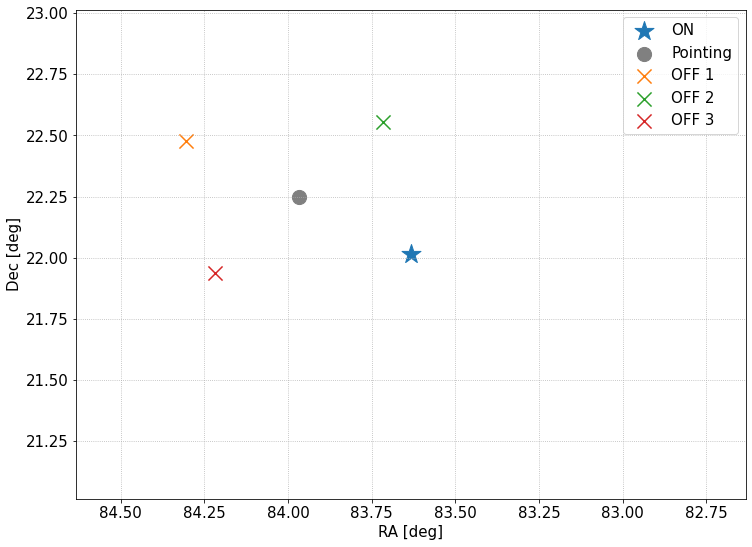

obs_id = 5093175
mean_offset = 0.409 [deg], mean_rot = 213.6 [deg]


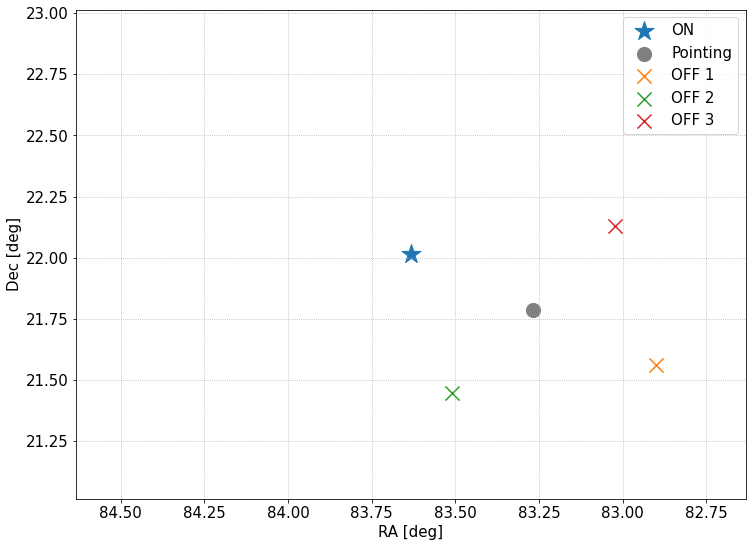

obs_id = 5093663
mean_offset = 0.390 [deg], mean_rot = 215.1 [deg]


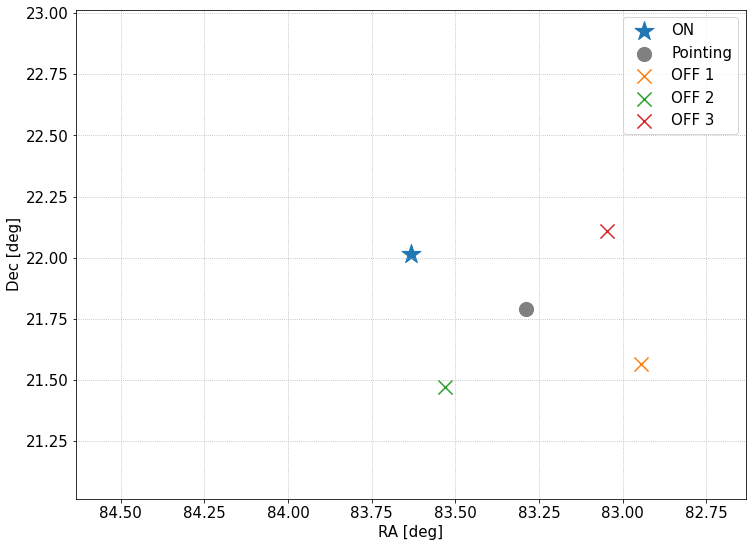

obs_id = 5093664
mean_offset = 0.409 [deg], mean_rot = 35.1 [deg]


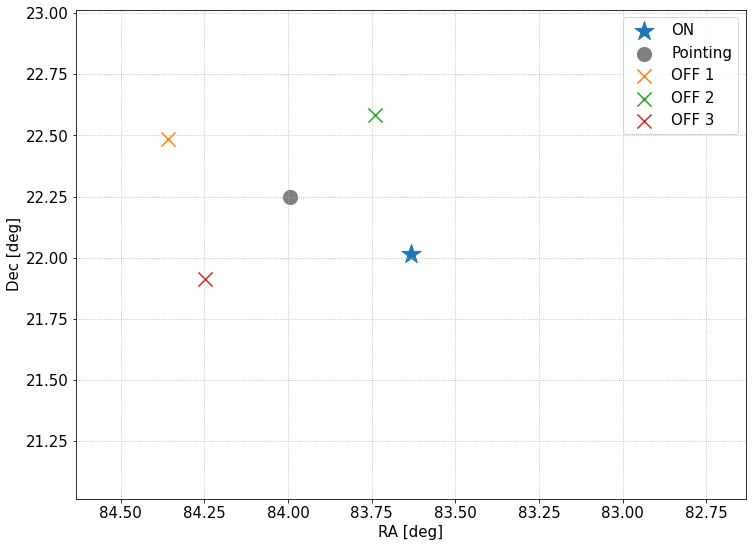

obs_id = 5093711
mean_offset = 0.386 [deg], mean_rot = 37.1 [deg]


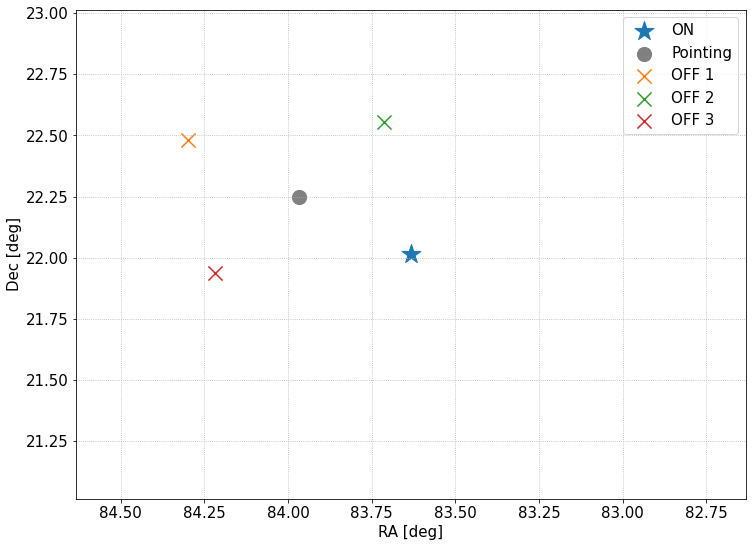

obs_id = 5093712
mean_offset = 0.411 [deg], mean_rot = 213.5 [deg]


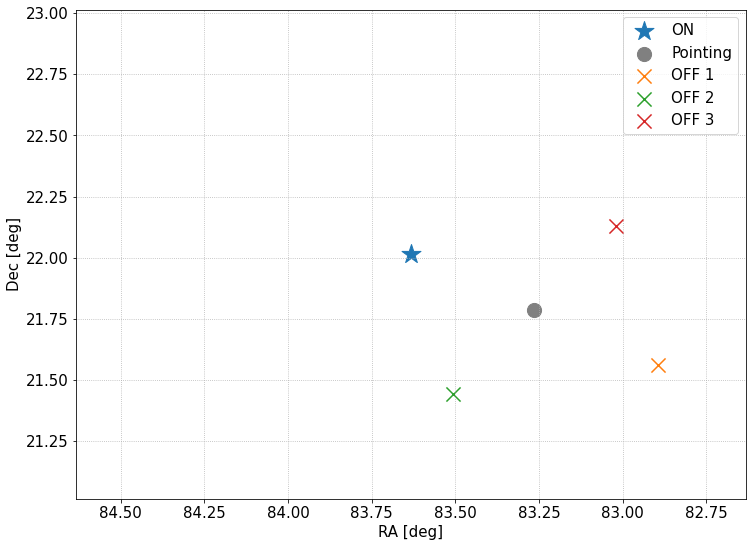

obs_id = 5093713
mean_offset = 0.388 [deg], mean_rot = 36.7 [deg]


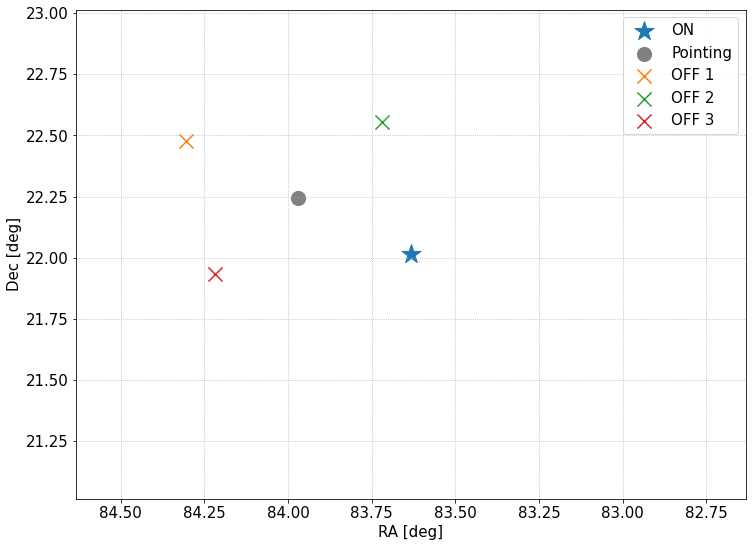

obs_id = 5093714
mean_offset = 0.408 [deg], mean_rot = 213.6 [deg]


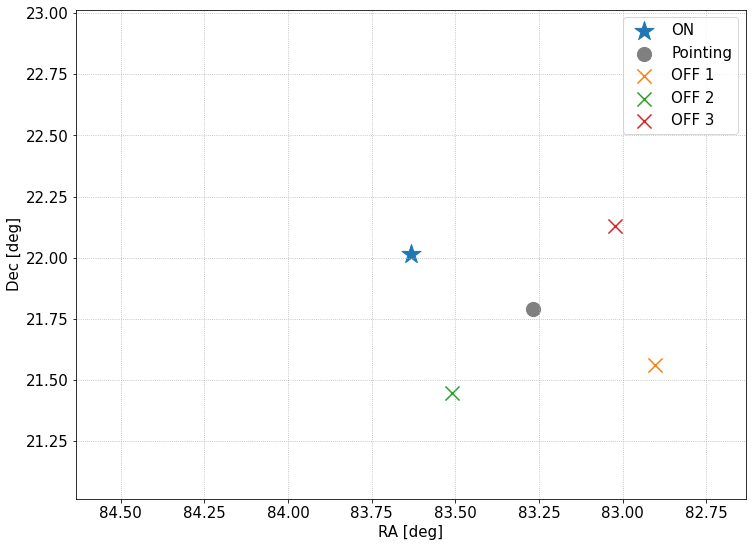

obs_id = 5094024
mean_offset = 0.405 [deg], mean_rot = 35.1 [deg]


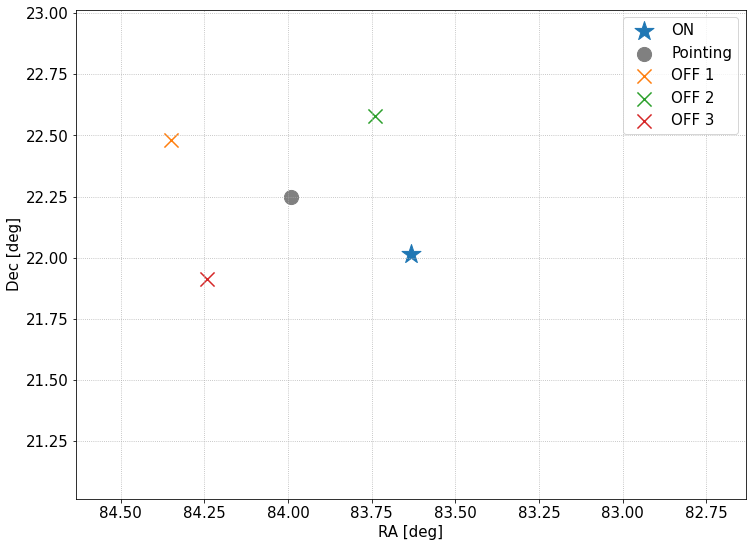

obs_id = 5094025
mean_offset = 0.391 [deg], mean_rot = 215.2 [deg]


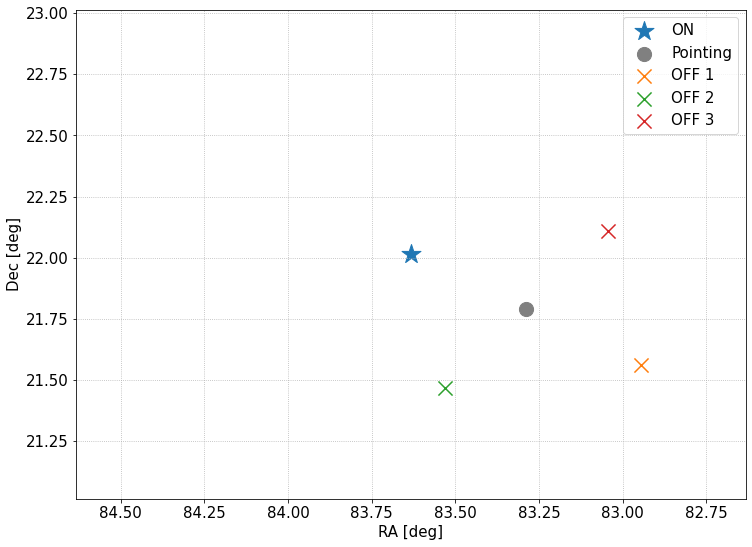

In [8]:
# === settings ===
source_name = 'Crab'
n_off_region = 3

# === main ===
on_coord = SkyCoord.from_name(source_name)
on_coord = on_coord.transform_to('icrs')

for obs_id in obs_ids_list:
    
    print(f'obs_id = {obs_id}')
    
    df_obs = df_dl2.query(f'obs_id == {obs_id}')
    
    event_coords = SkyCoord(
        ra=df_obs['ra_reco_mean'].values*u.deg, dec=df_obs['dec_reco_mean'].values*u.deg, frame='icrs'
    )
    
    tel_coords = SkyCoord(
        ra=df_obs['ra_tel'].values*u.deg, dec=df_obs['dec_tel'].values*u.deg, frame='icrs'
    )
    
    # --- calculate the angular separation ---
    theta_on, theta_off, off_coords = calc_angular_separation(
        on_coord, event_coords, tel_coords, n_off_region
    )
    
    df_dl2.loc[(obs_id, slice(None)), 'theta2_on'] = theta_on.to(u.deg).value**2
    
    for i_off in theta_off.keys():
        df_dl2.loc[(obs_id, slice(None)), f'theta2_off{i_off}'] = theta_off[i_off].to(u.deg).value**2
        
    # --- plot the coordinates ---
    pyplot.figure()
    pyplot.xlabel('RA [deg]')
    pyplot.ylabel('Dec [deg]')

    xlim = (on_coord.ra.value - 1, on_coord.ra.value + 1)
    ylim = (on_coord.dec.value - 1, on_coord.dec.value + 1)

    pyplot.xlim(xlim)
    pyplot.ylim(ylim)
    pyplot.axis([xlim[-1], xlim[0], ylim[0], ylim[-1]])

    pyplot.scatter(
        on_coord.ra.to(u.deg).value, on_coord.dec.to(u.deg).value, 
        label='ON', marker='*', s=400
    )

    pyplot.scatter(
        np.mean(tel_coords.ra.to(u.deg).value), np.mean(tel_coords.dec.to(u.deg).value),
        label='Pointing', marker='o', s=200, color='grey'
    )
    
    for i_off in off_coords.keys():
        pyplot.scatter(
            off_coords[i_off].ra.to(u.deg).value, off_coords[i_off].dec.to(u.deg).value, 
            label=f'OFF {i_off}', marker='x', s=200, color=color_cycle[i_off]
        )
    
    pyplot.grid()
    pyplot.legend()

    pyplot.show()
    pyplot.close()


# Check signal from source

### Function to find cuts to maximize the significance:

In [9]:
def get_best_cuts_signif(data, bins_gam_cut, bins_t2_cut):
    
    print('Checking parameter cuts to maximize the significance...')
    
    n_bins_gam_cut = len(bins_gam_cut)
    n_bins_t2_cut = len(bins_t2_cut)

    bins_gam_cut = np.repeat(bins_gam_cut, n_bins_t2_cut)
    bins_t2_cut = np.tile(bins_t2_cut, n_bins_gam_cut)

    signifs_list = np.array([])

    for gam_cut, t2_cut in zip(bins_gam_cut, bins_t2_cut):

        df = data.query(f'event_class_0_mean > {gam_cut}')

        n_on_obs = len(df.query(f'theta2_on < {t2_cut}'))
        n_off_obs = np.sum([len(df.query(f'theta2_off{i_off+1} < {t2_cut}')) for i_off in range(n_off_region)])

        alpha = 1/n_off_region

        stat = WStatCountsStatistic(n_on_obs, n_off_obs, alpha=alpha)
        signif = stat.sqrt_ts

        signifs_list = np.append(signifs_list, signif)

    condition = (signifs_list == np.max(signifs_list))

    gam_cut_best = bins_gam_cut[condition][0]
    t2_cut_best = bins_t2_cut[condition][0]
    
    return gam_cut_best, t2_cut_best

### Check theta2 distributions and significance:

Checking parameter cuts to maximize the significance...
Parameter cuts: (gammaness, theta2) = (0.8, 0.03)

N_on = 2123
N_off = 1157 (alpha = 0.333)

N_excess = 1737.3
obs_time = 133.3 min
--> rate = 13.0 [1 / min]

Li&Ma significance = 47.9 sigma



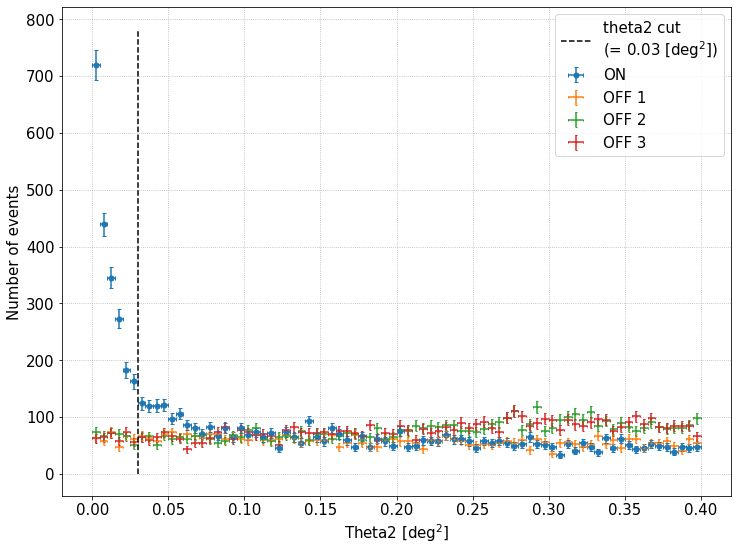

In [10]:
# === settings ===
bins_t2 = np.linspace(0, 0.4, 81)

gam_cut, t2_cut = get_best_cuts_signif(
    data=df_dl2, bins_gam_cut=np.round(np.arange(0.5, 0.91, 0.05), 2), 
    bins_t2_cut=np.round(np.arange(0.01, 0.051, 0.005), 3)
)

# gam_cut = 0.95
# t2_cut = 0.03

# === main ===
print(f'Parameter cuts: (gammaness, theta2) = ({gam_cut}, {t2_cut})')

# --- plot theta2 distributions --
pyplot.figure()
pyplot.xlabel('Theta2 [deg$^2$]')
pyplot.ylabel('Number of events')

df = df_dl2.query(f'event_class_0_mean > {gam_cut}')
hist_on, _ = np.histogram(df['theta2_on'].values, bins_t2)

bins_center = (bins_t2[:-1] + bins_t2[1:])/2
x_err = [bins_center - bins_t2[:-1], bins_t2[1:] - bins_center]

pyplot.errorbar(
    x=bins_center, xerr=x_err, y=hist_on, yerr=np.sqrt(hist_on), 
    fmt='o', capsize=2, markersize=5, label='ON'
)

for i_off in range(n_off_region):
    
    hist_off, _ = np.histogram(df[f'theta2_off{i_off+1}'].values, bins_t2)
    
    pyplot.errorbar(
        x=bins_center, xerr=x_err, y=hist_off, yerr=np.sqrt(hist_off), 
        fmt='o', capsize=1, markersize=1, label=f'OFF {i_off+1}'
    )
    
ylim = pyplot.ylim() 

pyplot.plot(
    (t2_cut, t2_cut), (0, ylim[1]), 
    linestyle='--', color='black', label=f'theta2 cut\n(= {t2_cut} [deg$^2$])'
)

pyplot.grid()
pyplot.legend()
    
# --- calculate the significance ---
n_on_obs = len(df.query(f'theta2_on < {t2_cut}'))
n_off_obs = np.sum([len(df.query(f'theta2_off{i_off+1} < {t2_cut}')) for i_off in range(n_off_region)])

alpha = 1/n_off_region

n_exs_obs = n_on_obs - alpha*n_off_obs
rate = n_exs_obs/obs_time.to(u.min)

print(f'\nN_on = {n_on_obs}\nN_off = {n_off_obs} (alpha = {alpha:.3f})')
print(f'\nN_excess = {n_exs_obs:.1f}\nobs_time = {obs_time.to(u.min):.1f}')
print(f'--> rate = {rate.value:.1f} [{rate.unit}]')

stat = WStatCountsStatistic(n_on_obs, n_off_obs, alpha=alpha)
signif = stat.sqrt_ts
                        
print(f'\nLi&Ma significance = {signif:.1f} sigma\n')

### Check count map:

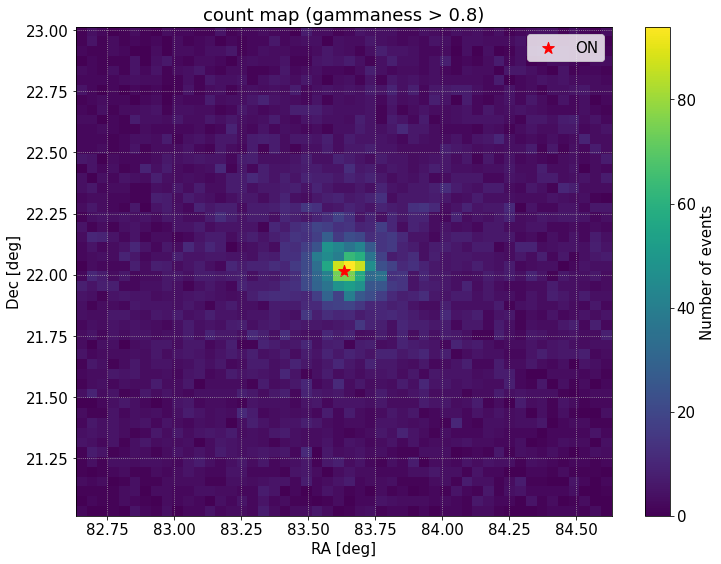

In [11]:
pyplot.figure()
pyplot.title(f'count map (gammaness > {gam_cut})')
pyplot.xlabel('RA [deg]')
pyplot.ylabel('Dec [deg]')

xlim = (on_coord.ra.value - 1, on_coord.ra.value + 1)
ylim = (on_coord.dec.value - 1, on_coord.dec.value + 1)

pyplot.xlim(xlim)
pyplot.ylim(ylim)
pyplot.axis([xlim[-1], xlim[0], ylim[0], ylim[-1]])

bins_radec=[np.linspace(xlim[0], xlim[1], 51), np.linspace(ylim[0], ylim[1], 51)]

pyplot.hist2d(df['ra_reco_mean'].values, df['dec_reco_mean'].values, bins=bins_radec)
pyplot.colorbar(label='Number of events')

pyplot.scatter(
    on_coord.ra.to(u.deg).value, on_coord.dec.to(u.deg).value, 
    label='ON', marker='*', s=150, color='red'
)

pyplot.legend()
pyplot.grid()